In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv("DATA/global_climate_events_cleaned.csv")

# Economic Impact Classes
df['impact_category'] = pd.qcut(
    df['economic_impact_million_usd'], 
    q=3, 
    labels=['Low', 'Medium', 'High']
)

# Affected Population Classes
df['population_category'] = pd.qcut(
    df['affected_population'], 
    q=3, 
    labels=['Low', 'Medium', 'High']
)

impact_per_capita              0.256503
duration_days                  0.134654
infrastructure_damage_score    0.117536
severity                       0.113658
country_India                  0.012882
event_type_Drought             0.012308
event_type_Heatwave            0.011031
event_type_Earthquake          0.011001
country_United States          0.009798
country_New Zealand            0.009790
dtype: float64


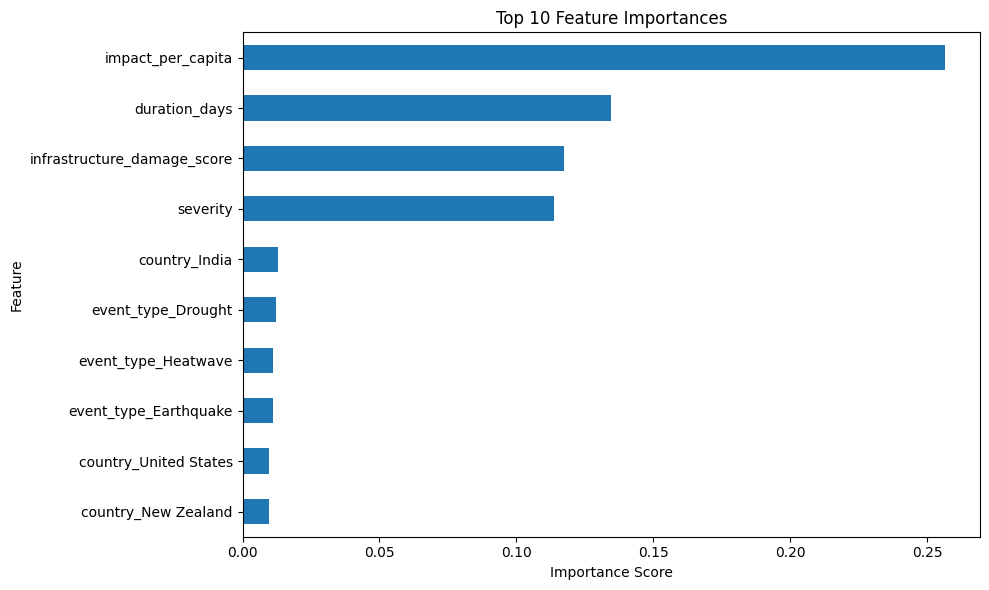

              precision    recall  f1-score   support

        High       0.82      0.82      0.82       200
         Low       0.85      0.87      0.86       212
      Medium       0.67      0.64      0.66       188

    accuracy                           0.78       600
   macro avg       0.78      0.78      0.78       600
weighted avg       0.78      0.78      0.78       600



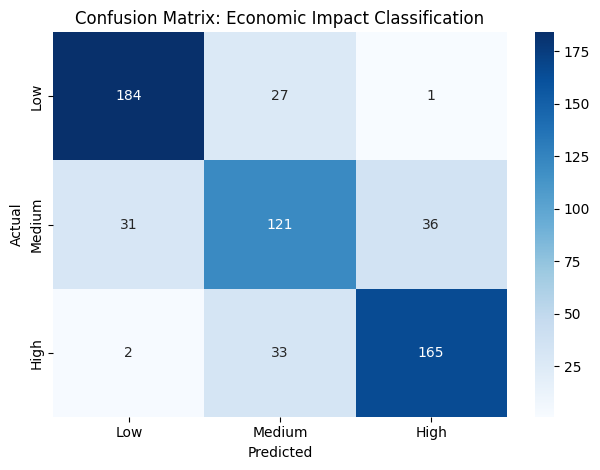

In [ ]:
## Economic Impact Classification Model

X = df[['severity', 'duration_days', 'infrastructure_damage_score', 'impact_per_capita']]
X = pd.get_dummies(pd.concat([X, df[['event_type', 'country']]], axis=1), drop_first=True)
y = df['impact_category']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(X_train, y_train)

# Create a Series of feature importances
importances = pd.Series(rf_classifier.feature_importances_, index=X_train.columns)

importances = importances.sort_values(ascending=False)

print(importances.head(10))

plt.figure(figsize=(10,6))
importances.head(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

# Predictions
y_pred = rf_classifier.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred, labels=['Low','Medium','High'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low','Medium','High'], yticklabels=['Low','Medium','High'])
plt.title("Confusion Matrix: Economic Impact Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


impact_per_capita              0.159406
infrastructure_damage_score    0.120590
severity                       0.081158
duration_days                  0.073098
country_New Zealand            0.015647
country_Brazil                 0.015595
country_Qatar                  0.014667
country_Russia                 0.014606
country_India                  0.014405
country_Denmark                0.014339
dtype: float64


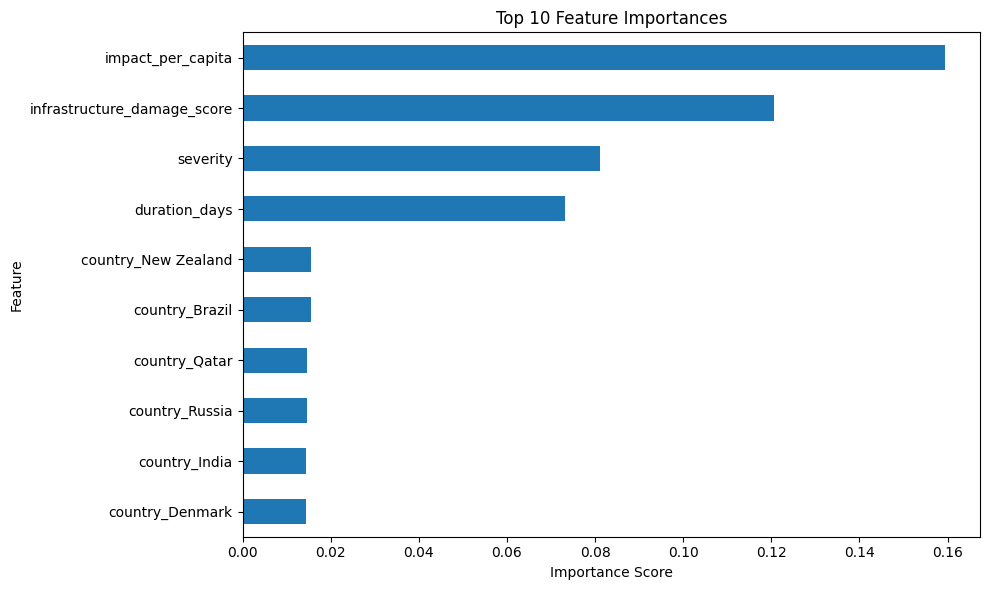

              precision    recall  f1-score   support

        High      0.792     0.820     0.806       200
         Low      0.776     0.795     0.785       200
      Medium      0.606     0.570     0.588       200

    accuracy                          0.728       600
   macro avg      0.725     0.728     0.726       600
weighted avg      0.725     0.728     0.726       600



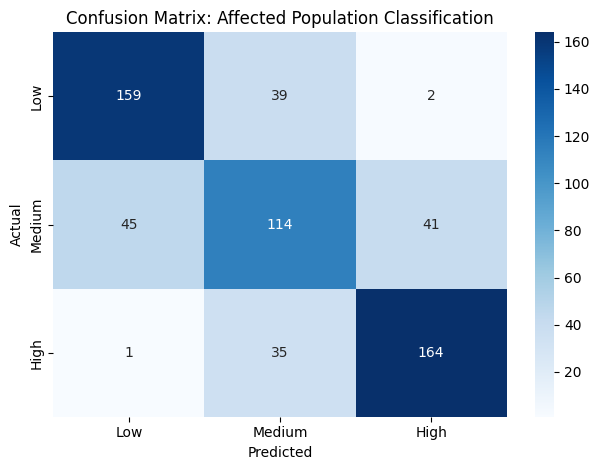

In [ ]:
## Affected Population Classification Model

X = df[['severity', 'duration_days', 'infrastructure_damage_score', 'impact_per_capita']]
X = pd.get_dummies(pd.concat([X, df[['event_type', 'country']]], axis=1), drop_first=True)

y = df['population_category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(X_train, y_train)


# Create a Series of feature importances
importances = pd.Series(rf_classifier.feature_importances_, index=X_train.columns)

importances = importances.sort_values(ascending=False)

print(importances.head(10))

plt.figure(figsize=(10,6))
importances.head(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

y_pred = rf_classifier.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred, labels=['Low','Medium','High'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low','Medium','High'], yticklabels=['Low','Medium','High'])
plt.title("Confusion Matrix: Affected Population Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()